### PART 3 - TIME SERIES DATA

This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment
rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.

In [26]:
%pip install openpyxl
%pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.



In [27]:
df = pd.read_excel('./textfiles/threecenturies_v2.3.xlsx', sheet_name='A1. Headline series')

In [28]:
#Real GDP at market prices for the period 1900-2000
real_GDP = df.loc[246:346, 'A1. Headline Annual Series'].reset_index(drop=True)
real_GDP = real_GDP.rename('Real GDP at market prices')

#Unemployment rate for the period 1900-2000
unemp_rate = df.loc[246:346, 'Unnamed: 15'].reset_index(drop=True)
unemp_rate = unemp_rate.rename('Unemployment rate')

#Consumer price inflation for the period 1900-2000
cons_price_infl = df.loc[246:346, 'Unnamed: 28'].reset_index(drop=True)
cons_price_infl = cons_price_infl.rename('Consumer price inflation')

In [29]:
unemp_rate

0      3.679865
1      4.877351
2      5.145694
3      5.603507
4      6.914821
         ...   
96     8.097052
97     6.972014
98     6.255467
99     5.976813
100    5.459049
Name: Unemployment rate, Length: 101, dtype: object

### 27. Define strict and weak stationarity.

A time series is said to be strictly stationary if the joint distribution of any set of observations is invariant under time shifts. In simpler terms, the entire probability distribution of the series remains constant over time. This implies that the mean, variance, and all higher-order moments of the distribution do not change with time. 

A time series is considered weakly stationary if the mean, variance, and autocorrelation structure remain constant over time. So, unlike strict stationarity, weak stationarity allows for shifts in the higher-order moments of the distribution, as long as the first and second moments (mean and variance) are constant.

### 28. Explain ergodicity and state the ergodic theorem. Illustrate with an example. 

In an ergodic system, the statistical properties derived from a single, sufficiently long time series realization are representative of the ensemble average over all possible realizations of the process. In simpler terms, the system explores all its possible states over time, and the long-term behavior of a single trajectory provides meaningful information about the entire system.

The Birkhoff Ergodic Theorem states that, for an ergodic process, the time average of a function along a single trajectory converges to the ensemble average as the length of the observation time increases.
Mathematically, if $X_t$ represents a time series and $f$ is a measurable function, the Birkhoff Ergodic Theorem can be expressed as follows:

$$ lim_{T→∞}\frac{1}{X_T} \int_{0}^{T} f(X_t) \, dt=E[f(X_t)] $$
where $E$ denotes the ensemble average.

Now let's see a simple example. Consider a simple random walk process where the value at each time step is determined by flipping a fair coin. Let $X_t$ be the position of the walker at time $t$, where the walker moves +1 with probability 0.5 and -1 with probability 0.5.

Then $X_t$ could be the position of the walker, i.e., we take $f$ in the previous theorem as the identity function. The ergodic theorem implies that the time average of the position over a long time should converge to the expected position over all possible trajectories. Notice that, as our time serie is discrete, the integral becomes a sum:
$$ lim_{T→∞}\frac{1}{X_T} \sum_{0}^{T} X_t = E(X_t) $$

In this example, the long-term average position of the walker along a single trajectory should converge to zero, as the expected position over all possible trajectories is zero (since the coin is fair, and the expected value of each step is $0.5×1+0.5×(−1)=0$.

### 29. Why do we need both stationarity and ergodicity? 


### 30. Explain “spurious regression”. 


### 31. Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average.

### 32. Make all time series stationary by computing the difference between the original variable and a moving average of order 5.

In [ ]:
print(real_GDP)

In [39]:
# Compute the moving average of order 5 for real_GDP
moving_avg_real_gdp = real_GDP.rolling(window=5).mean()


# Compute the difference between the original variable and the moving average for real_gdp
real_gdp_stationary = real_GDP - moving_avg_real_gdp

# idem for unemp_rate and cons_price_infl
moving_avg_unemp_rate = unemp_rate.rolling(window=5).mean()
unemp_rate_stationary = unemp_rate - moving_avg_unemp_rate
moving_avg_cons_price_infl = cons_price_infl.rolling(window=5).mean()

price_inf_stationary = cons_price_infl - moving_avg_cons_price_infl

0               NaN
1               NaN
2               NaN
3               NaN
4      1.856125e+05
           ...     
96     1.177918e+06
97     1.212230e+06
98     1.249156e+06
99     1.285924e+06
100    1.326999e+06
Name: Real GDP at market prices, Length: 101, dtype: float64


### 33. Compute the difference between the resulting time series of question 32 and a moving average of order 10. Give the exact formula for the weights after the two transformations.

### 34. Using the original dataset, test the unit root hypothesis for all variables. 

In [31]:
from statsmodels.tsa.stattools import adfuller

real_GDP_ADF = adfuller(real_GDP.dropna())
unemp_rate_ADF = adfuller(unemp_rate.dropna())
cons_price_infl_ADF = adfuller(cons_price_infl.dropna())

print('ADF Statistic Real GDP: %f' % real_GDP_ADF[0])
print('p-value: %f' % real_GDP_ADF[1])
print('Critical Values:')
for key, value in real_GDP_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: 4.334307
p-value: 1.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
ADF Statistic Unemployment Rate: -2.363203
p-value: 0.152393
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
ADF Statistic Consummer Price Inflation: -4.050359
p-value: 0.001169
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In the case of $\textit{Consumer Price Inflation}$, we observe that the $\textit{ADF Statistic}$ (-4.050359) is lower than all critical values, and the $\textit{p-value}$ (0.001169) is less than a common significance level like 0.05. Therefore, we can reject the null hypothesis. This suggests that the time series of $\textit{Consumer Price Inflation}$ is stationary. On the contrary, for $\textit{Real GDP}$ and the Unemployment Rate, the $\textit{ADF Statistic}$ is higher than the critical values at 1%, 5%, and 10%. Moreover, the $\textit{p-value}$ is greater than 0.05. Therefore, we cannot reject the null hypothesis of a unit root. In both cases, it may be necessary to explore other methods or transformations to make the time series stationary before modeling them.

### 35. Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34. 


In [32]:
real_GDP_stat_ADF = adfuller(real_gdp_stationary.dropna())
unemp_rate_stat_ADF = adfuller(unemp_rate_stationary.dropna())
cons_price_infl_stat_ADF = adfuller(price_inf_stationary.dropna())

print('ADF Statistic Real GDP: %f' % real_GDP_stat_ADF[0])
print('p-value: %f' % real_GDP_stat_ADF[1])
print('Critical Values:')
for key, value in real_GDP_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_stat_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_stat_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: -0.371381
p-value: 0.914769
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585
ADF Statistic Unemployment Rate: -4.911161
p-value: 0.000033
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
ADF Statistic Consummer Price Inflation: -4.989333
p-value: 0.000023
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### 36. Explain the difference between ACF and PACF.

### 37. Plot and comment on the ACF and PACF of all variables. 


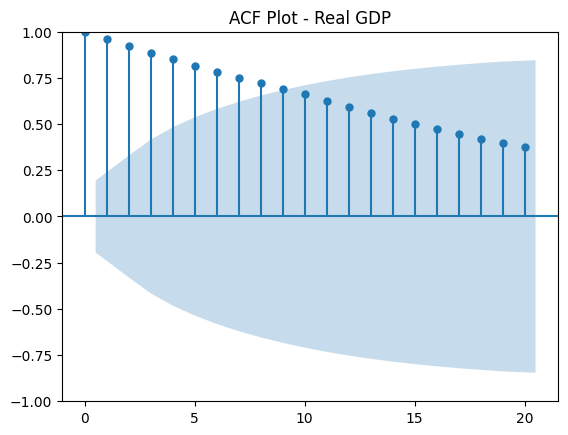

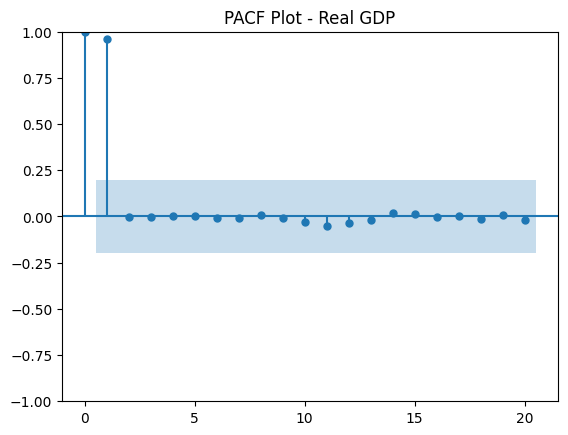

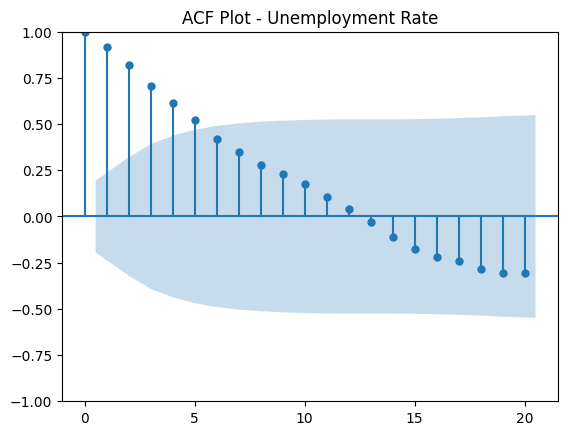

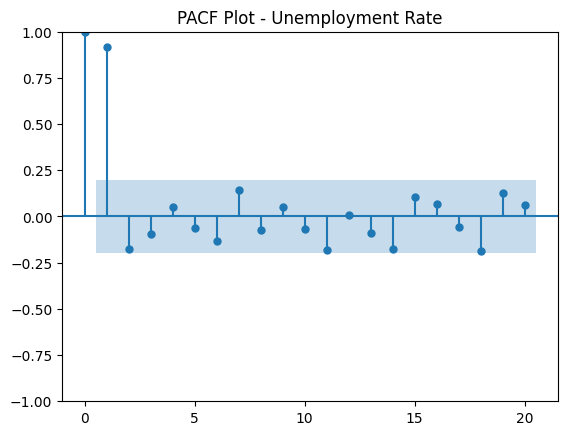

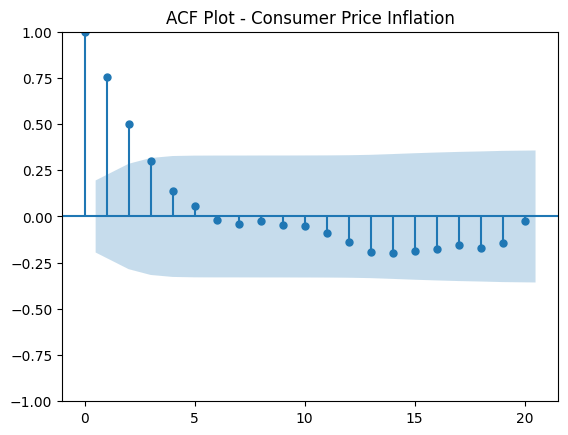

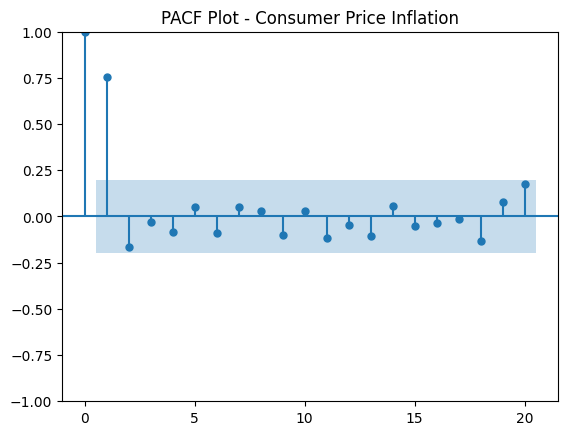

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute ACF and PACF for real_GDP
plot_acf(real_GDP, lags=20)
plt.title('ACF Plot - Real GDP')
plt.show()
plot_pacf(real_GDP, lags=20)
plt.title('PACF Plot - Real GDP')
plt.show()

# Compute ACF and PACF for unemp_rate
plot_acf(unemp_rate, lags=20)
plt.title('ACF Plot - Unemployment Rate')
plt.show()
plot_pacf(unemp_rate, lags=20)
plt.title('PACF Plot - Unemployment Rate')
plt.show()

# Compute ACF and PACF for cons_price_infl
plot_acf(cons_price_infl, lags=20)
plt.title('ACF Plot - Consumer Price Inflation')
plt.show()
plot_pacf(cons_price_infl, lags=20)
plt.title('PACF Plot - Consumer Price Inflation')
plt.show()

### 38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion. 


### 39. Explain the problem of auto-correlation of the errors. 

### 40. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors. 


In [34]:
# Add a constant column to the independent variables
X = sm.add_constant(pd.concat([unemp_rate_stationary, price_inf_stationary], axis=1))

# Convert X and real_gdp_stationary to numpy arrays
X = np.asarray(X, dtype=np.float64)
real_gdp_stationary = np.asarray(real_gdp_stationary, dtype=np.float64)

# Fit the regression model
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X).all(axis=1) & np.isfinite(real_gdp_stationary)
X = X[valid_rows]
real_gdp_stationary = real_gdp_stationary[valid_rows]

# Fit the regression model
model = sm.OLS(real_gdp_stationary, X)
results = model.fit()

# Test the hypothesis of no-autocorrelation of errors
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
p_value = sm.stats.stattools.durbin_watson(results.resid)

print(results.summary())
print("Durbin-Watson statistic:", dw_statistic)
print("p-value:", p_value)
results = model.fit()

# Test the hypothesis of no-autocorrelation of errors
dw_statistic = sm.stats.stattools.durbin_watson(results.resid)
p_value = sm.stats.stattools.durbin_watson(results.resid)

print(results.summary())
print("Durbin-Watson statistic:", dw_statistic)
print("p-value:", p_value)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     12.29
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.81e-05
Time:                        13:21:00   Log-Likelihood:                -1112.6
No. Observations:                  97   AIC:                             2231.
Df Residuals:                      94   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.455e+04   2392.277     10.264      0.0

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


After the Durbin-Watson test, $\textit{p-value}$ is greater than 0.05. We then fail to reject the null hypothesis, suggesting no evidence of autocorrelation.

### 41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40. 


In [35]:
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X).all(axis=1) & np.isfinite(real_gdp_stationary)
X = X[valid_rows]
real_gdp_stationary = real_gdp_stationary[valid_rows]

# Create the GLS model
model = sm.GLS(endog=real_gdp_stationary, exog=X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            GLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     12.29
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.81e-05
Time:                        13:21:00   Log-Likelihood:                -1112.6
No. Observations:                  97   AIC:                             2231.
Df Residuals:                      94   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.455e+04   2392.277     10.264      0.0

### 42. For all variables, construct their lag 1 and lag 2 variables. 

In [36]:
# Construct lag 1 and lag 2 variables for real_gdp_stationary
real_gdp_lag1 = np.roll(real_gdp_stationary, 1)
real_gdp_lag2 = np.roll(real_gdp_stationary, 2)

# Construct lag 1 and lag 2 variables for unemp_rate_stationary
unemp_rate_lag1 = np.roll(unemp_rate_stationary, 1)
unemp_rate_lag2 = np.roll(unemp_rate_stationary, 2)

# Construct lag 1 and lag 2 variables for price_inf_stationary
price_inf_lag1 = np.roll(price_inf_stationary, 1)
price_inf_lag2 = np.roll(price_inf_stationary, 2)


### 43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why? 


In [37]:
import statsmodels.api as sm

# Combine the independent variables into a matrix
X = sm.add_constant(np.vstack((unemp_rate_lag1, unemp_rate_lag2, price_inf_lag1, price_inf_lag2)).T)

# Create the regression model
model = sm.OLS(real_gdp_stationary, X)

# Fit the model
results = model.fit()

# Print the summary of the model
print(results.summary())


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:220: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### 44. State and test the no-Granger causality hypothesis of inflation on GDP at the 10% level

### 45. Divide the sample in two groups: 1900-1950 and 1951-2000. Test the stability of coefficients between the two periods. 

In [38]:
real_gdp_first_half = real_GDP[:50]
real_gdp_second_half = real_GDP[50:]

unemp_rate_first_half = unemp_rate[:50]
unemp_rate_second_half = unemp_rate[50:]

price_inf_first_half = cons_price_infl[:50]
price_inf_second_half = cons_price_infl[50:]

### 46. Test the structural breakpoint using a trim ratio of 25% at the 10% level 